In [129]:
# Import the libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

In [130]:
# Load the dataset
clean_data=pd.read_csv(r"C:\Users\YATHARTH\OneDrive\Desktop\spotify_data clean.csv")
final_data=pd.read_csv(r"C:\Users\YATHARTH\OneDrive\Desktop\track_data_final.csv")

In [131]:
print('CLEAN_DATA')
print('Rows:',clean_data.shape[0])
print('Columns:',clean_data.shape[1])

print('FINAL DATA')
print('Rows:',final_data.shape[0])
print('Columns:',final_data.shape[1])

CLEAN_DATA
Rows: 8582
Columns: 15
FINAL DATA
Rows: 8778
Columns: 15


In [132]:
# Info of clean and final data 
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8582 entries, 0 to 8581
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   track_id            8582 non-null   object 
 1   track_name          8582 non-null   object 
 2   track_number        8582 non-null   int64  
 3   track_popularity    8582 non-null   int64  
 4   explicit            8582 non-null   bool   
 5   artist_name         8579 non-null   object 
 6   artist_popularity   8582 non-null   int64  
 7   artist_followers    8582 non-null   int64  
 8   artist_genres       5221 non-null   object 
 9   album_id            8582 non-null   object 
 10  album_name          8582 non-null   object 
 11  album_release_date  8582 non-null   object 
 12  album_total_tracks  8582 non-null   int64  
 13  album_type          8582 non-null   object 
 14  track_duration_min  8582 non-null   float64
dtypes: bool(1), float64(1), int64(5), object(8)
memory usag

In [133]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8778 entries, 0 to 8777
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   track_id            8778 non-null   object 
 1   track_name          8776 non-null   object 
 2   track_number        8778 non-null   int64  
 3   track_popularity    8778 non-null   int64  
 4   track_duration_ms   8778 non-null   int64  
 5   explicit            8778 non-null   bool   
 6   artist_name         8774 non-null   object 
 7   artist_popularity   8774 non-null   float64
 8   artist_followers    8774 non-null   float64
 9   artist_genres       8774 non-null   object 
 10  album_id            8778 non-null   object 
 11  album_name          8776 non-null   object 
 12  album_release_date  8778 non-null   object 
 13  album_total_tracks  8778 non-null   int64  
 14  album_type          8778 non-null   object 
dtypes: bool(1), float64(2), int64(4), object(8)
memory usag

In [134]:
# Checking for the null/missing values 
print('Missing Values of clean Dataset')
(clean_data.isnull().sum()*100/len(clean_data)).sort_values(ascending=False)

Missing Values of clean Dataset


artist_genres         39.163365
artist_name            0.034957
track_name             0.000000
track_number           0.000000
track_popularity       0.000000
explicit               0.000000
track_id               0.000000
artist_popularity      0.000000
artist_followers       0.000000
album_id               0.000000
album_name             0.000000
album_release_date     0.000000
album_total_tracks     0.000000
album_type             0.000000
track_duration_min     0.000000
dtype: float64

In [135]:
print('Missing Values of Final Dataset')
(final_data.isnull().sum()*100/len(final_data)).sort_values(ascending=False)

Missing Values of Final Dataset


artist_name           0.045568
artist_followers      0.045568
artist_popularity     0.045568
artist_genres         0.045568
album_name            0.022784
track_name            0.022784
track_id              0.000000
explicit              0.000000
track_duration_ms     0.000000
track_popularity      0.000000
track_number          0.000000
album_id              0.000000
album_release_date    0.000000
album_total_tracks    0.000000
album_type            0.000000
dtype: float64

In [136]:
clean_data.duplicated().sum()
# There are no duplicate values in the data 

np.int64(0)

In [137]:
# We can see that the clean data has more missing values as compared to final data.
# Hence we need to work upon the clean data.

# DESCRIPTIVE ANALYSIS

In [138]:
clean_data.describe().T

,count,mean,std,min,25%,50%,75%,max
track_number,8582.0,5.772547e+00,6.052792e+00,1.00,1.00,4.000,9.00,1.020000e+02
track_popularity,8582.0,5.235621e+01,2.381608e+01,0.00,39.00,58.000,71.00,9.900000e+01
artist_popularity,8582.0,6.973002e+01,1.964598e+01,0.00,60.00,74.000,84.00,1.000000e+02
artist_followers,8582.0,2.403472e+07,3.803180e+07,0.00,462320.00,6105547.000,27252551.00,1.455421e+08
album_total_tracks,8582.0,1.378944e+01,1.188713e+01,1.00,6.00,13.000,17.00,1.810000e+02
track_duration_min,8582.0,3.492805e+00,1.057970e+00,0.07,2.88,3.445,3.99,1.351000e+01


In [139]:
clean_data.describe(include=object).T

,count,unique,top,freq
track_id,8582,8582,61GEP8lryEfcuEgBMbRmNi,1
track_name,8582,7462,Home,8
artist_name,8579,2547,Taylor Swift,324
artist_genres,5221,661,soundtrack,345
album_id,8582,5205,3FFGbUutKWN1c4f0CJR4Uh,70
album_name,8582,4870,Nevermind (Super Deluxe Edition),70
album_release_date,8582,2384,2010-01-01,76
album_type,8582,3,album,5856


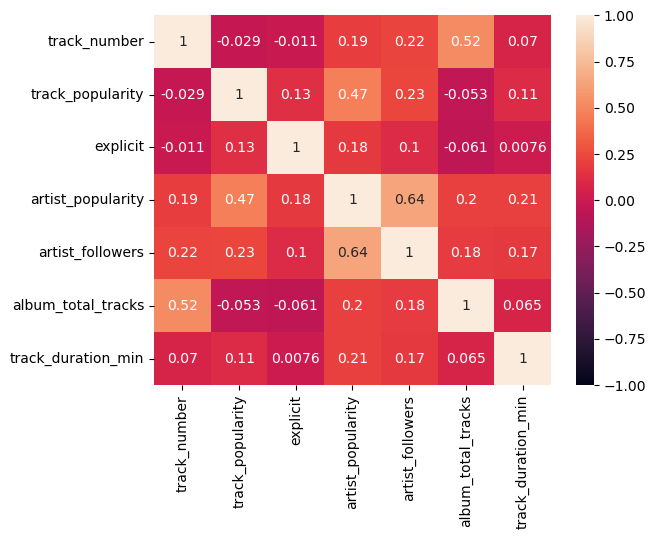

In [140]:
# Lets see the correlation between the numerical columns 
sns.heatmap(clean_data.corr(numeric_only=True),annot=True,vmin=-1)
plt.show()

In [141]:
# As such there is no Strong relation between the numerical columns 

In [142]:
#Lets define numerical columns and categorical columns
num_cols=clean_data.select_dtypes(np.number).columns
cat_cols=clean_data.select_dtypes(object).columns

In [143]:
num_cols

Index(['track_number', 'track_popularity', 'artist_popularity',
       'artist_followers', 'album_total_tracks', 'track_duration_min'],
      dtype='object')

In [144]:
cat_cols

Index(['track_id', 'track_name', 'artist_name', 'artist_genres', 'album_id',
       'album_name', 'album_release_date', 'album_type'],
      dtype='object')

In [145]:
# Convert album_release_date to datetime and extract year
clean_data['album_release_date'] = pd.to_datetime(clean_data['album_release_date'], errors='coerce')
clean_data['year'] = clean_data['album_release_date'].dt.year

# Univariate Analysis

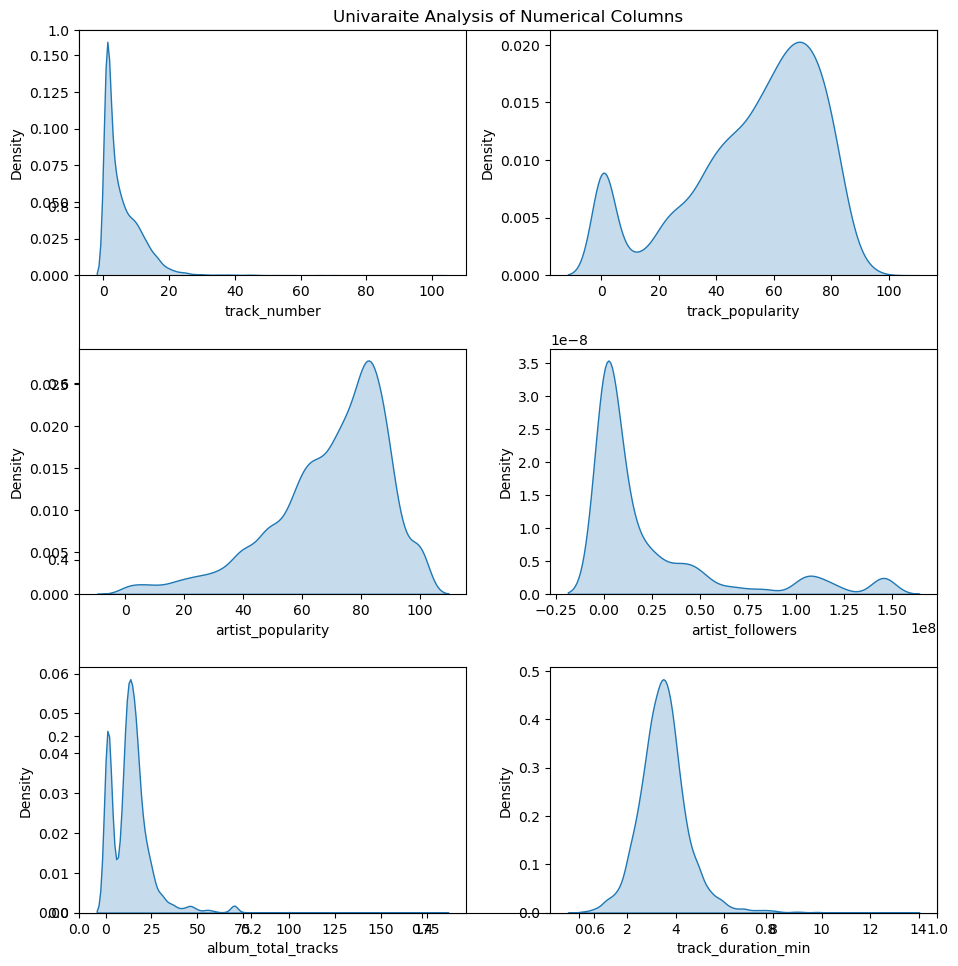

In [146]:
# Lets explore the numerical columns 
t=1
plt.figure(figsize=(10,10))
plt.title('Univaraite Analysis of Numerical Columns')
for i in num_cols:
    plt.subplot(3,2,t)
    sns.kdeplot(data=clean_data,x=i,fill=True)
    t+=1
plt.tight_layout()
plt.show()

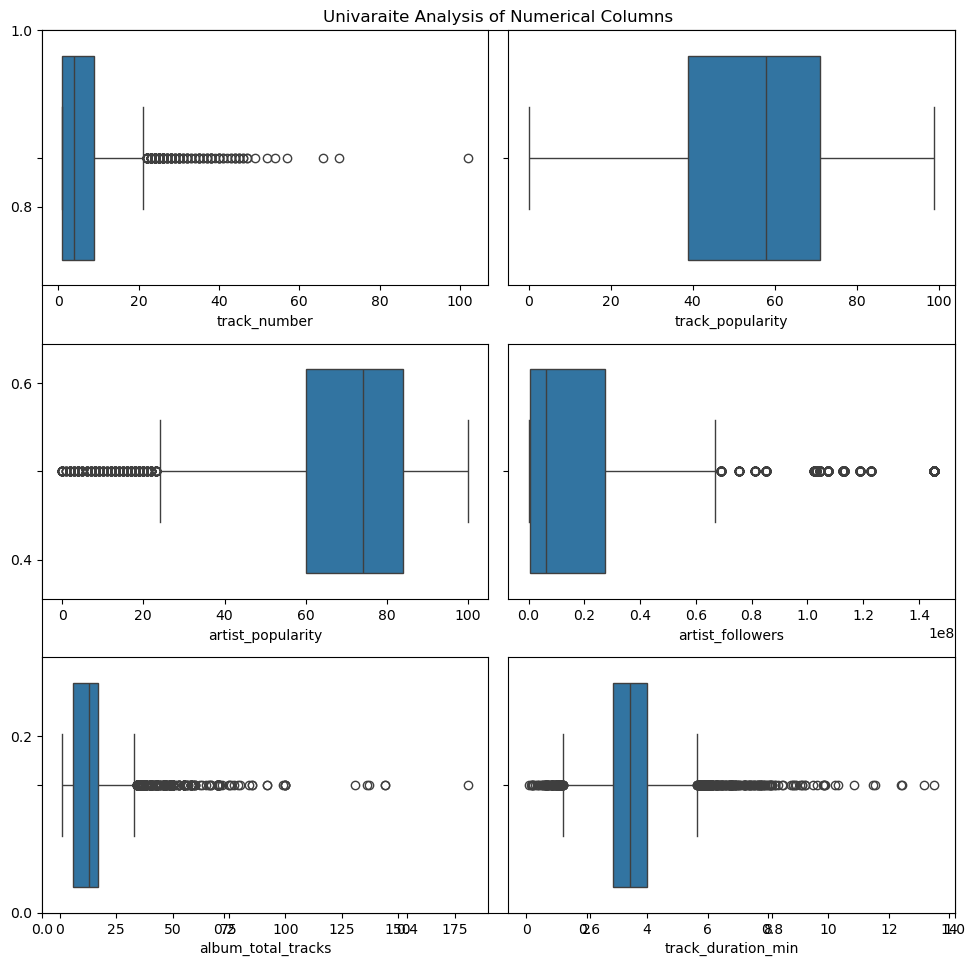

In [147]:
t=1
plt.figure(figsize=(10,10))
plt.title('Univaraite Analysis of Numerical Columns')
for i in num_cols:
    plt.subplot(3,2,t)
    sns.boxplot(data=clean_data,x=i,fill=True)
    t+=1
plt.tight_layout()
plt.show()

# There are outliers in the data 

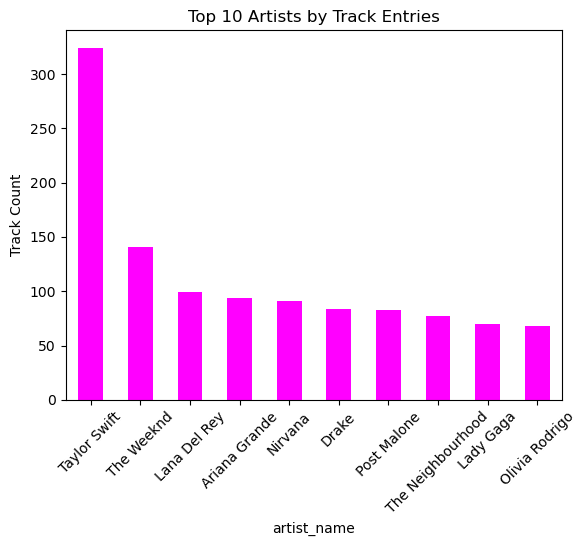

In [148]:
if 'artist_name' in clean_data.columns:
    top_artists = clean_data['artist_name'].value_counts().head(10)
    top_artists.plot(kind='bar', color='magenta')
    plt.title('Top 10 Artists by Track Entries')
    plt.ylabel('Track Count')
    plt.xticks(rotation=45)
    plt.show()

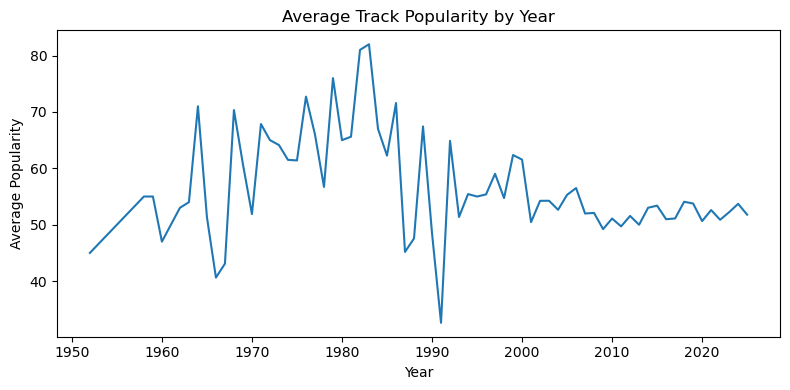

In [149]:
avg_pop_year = clean_data.groupby('year')['track_popularity'].mean()
plt.figure(figsize=(8,4))
avg_pop_year.plot()
plt.title('Average Track Popularity by Year')
plt.xlabel('Year')
plt.ylabel('Average Popularity')
plt.tight_layout()
plt.show()

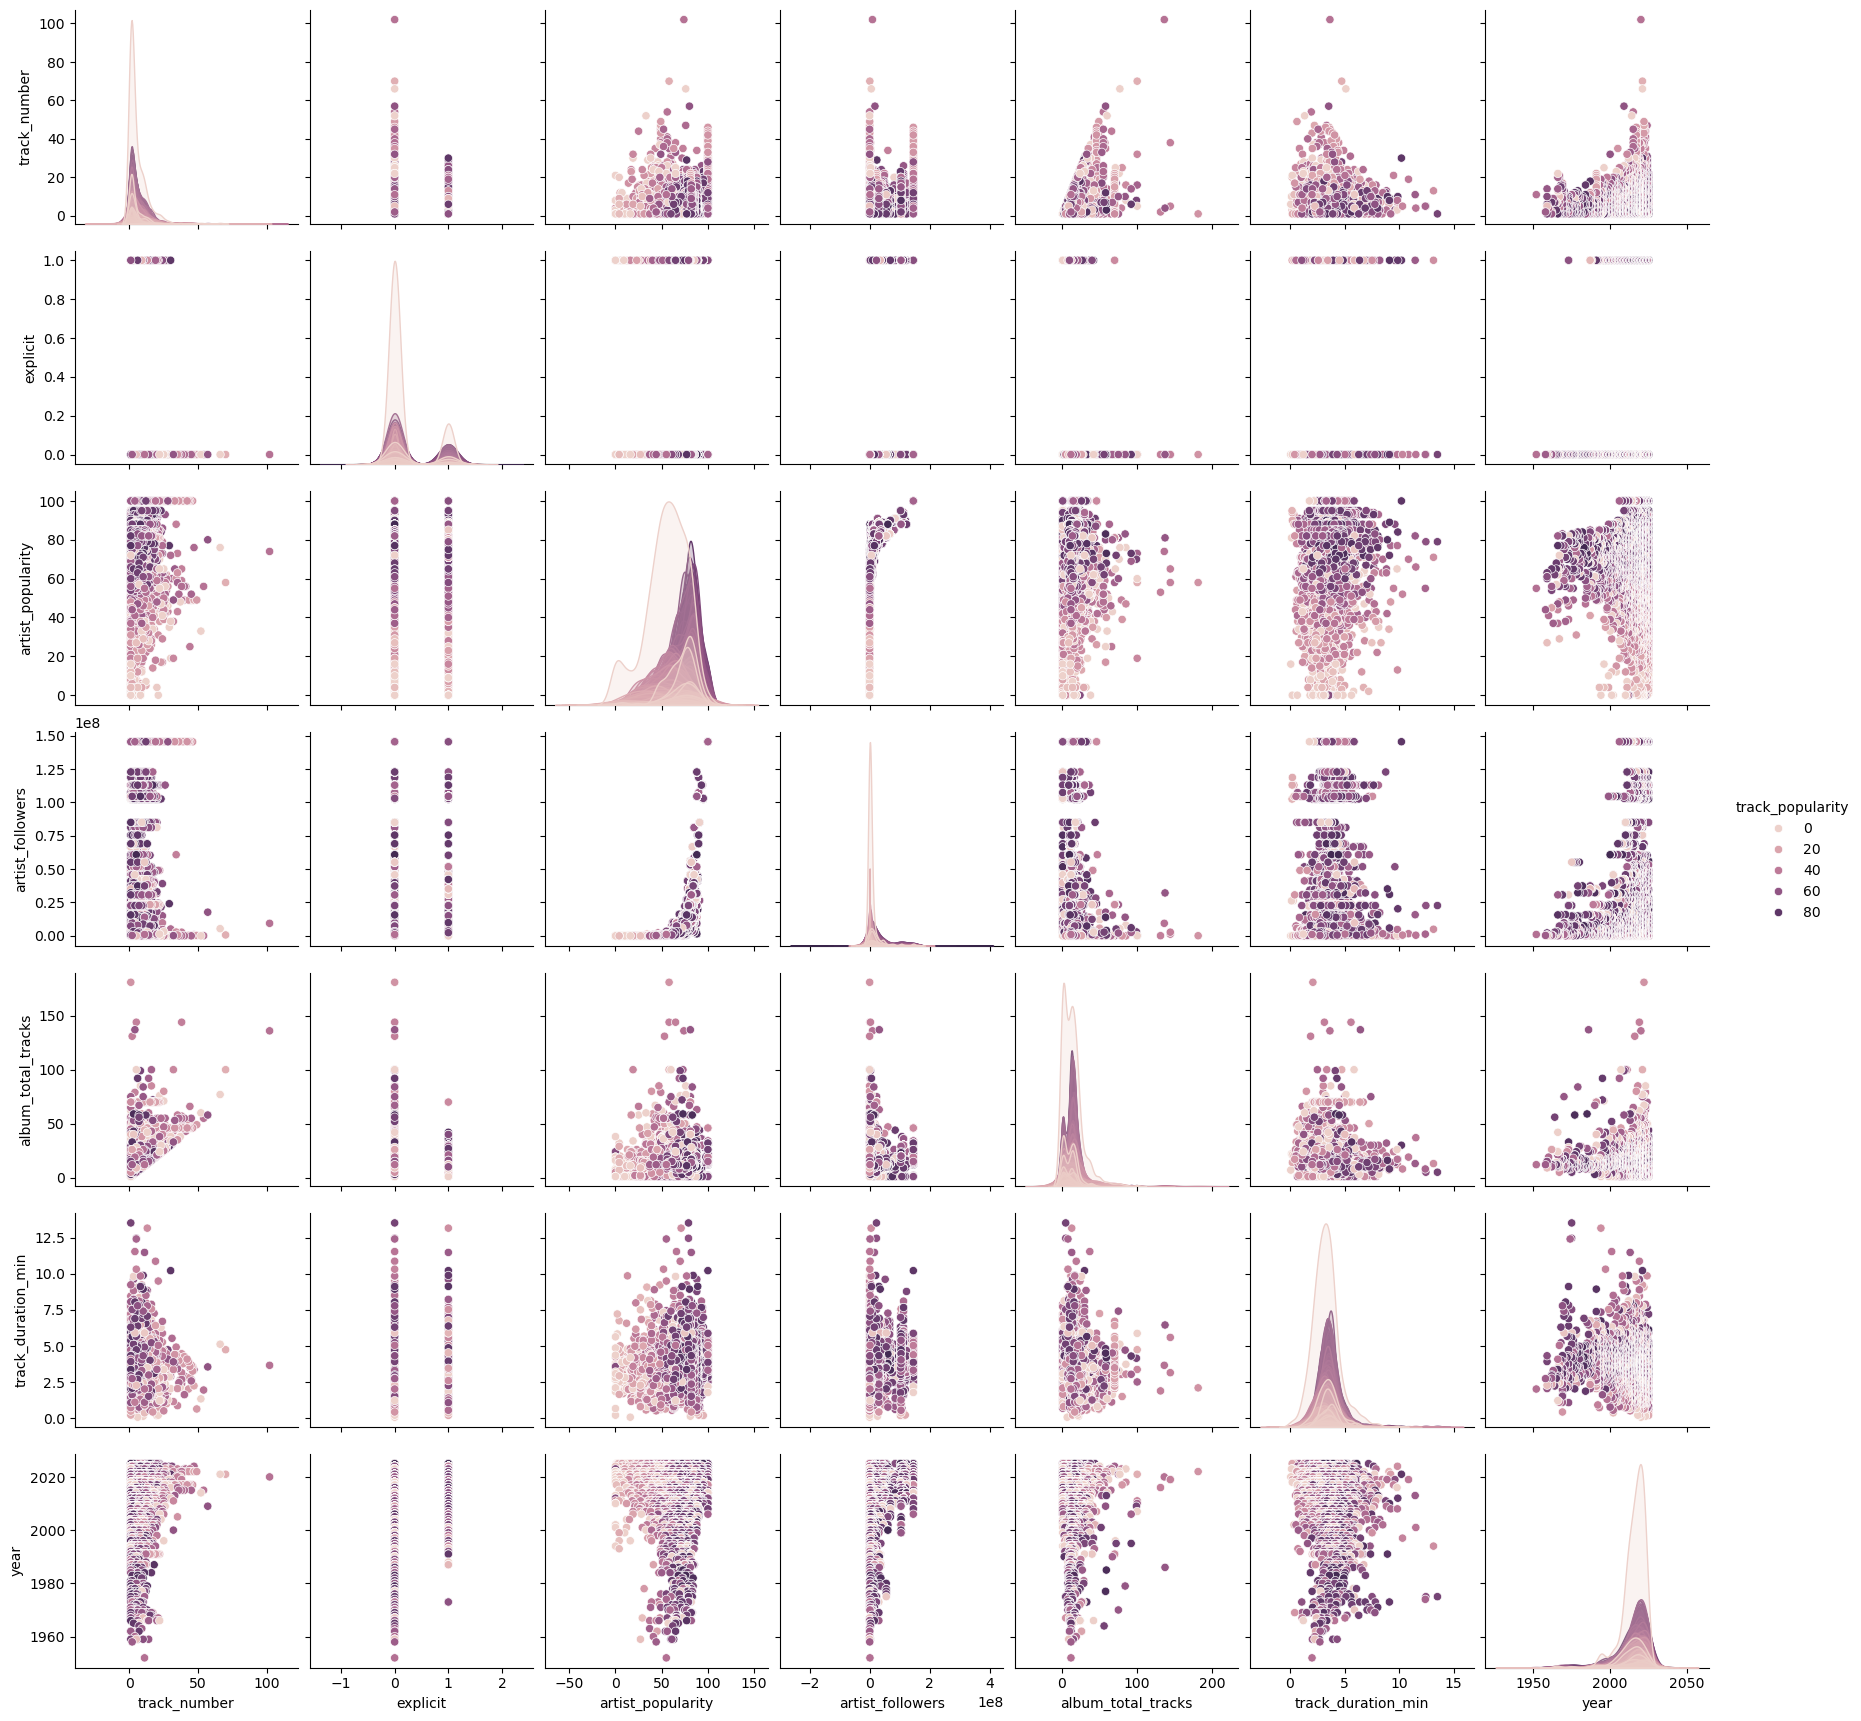

In [150]:
sns.pairplot(data=clean_data,hue='track_popularity')
plt.show()

# Data Preprocessing

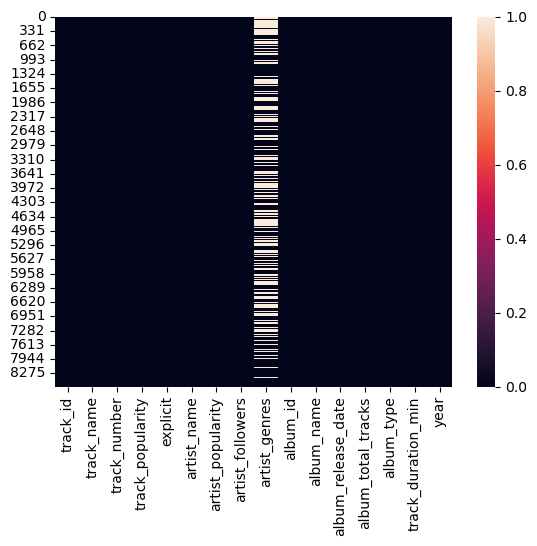

In [151]:
# Checking the missing values
sns.heatmap(clean_data.isnull())
plt.show()

In [152]:
# Capping the missing values 
for i in num_cols:
    q3,q1=clean_data[i].quantile([0.75,0.25])
    iqr=q3-q1
    ul,ll=q3+1.5*iqr,q1-1.5*iqr
    clean_data[i]=clean_data[i].apply(lambda i:ul if i>ul else ll if i<ll else i)

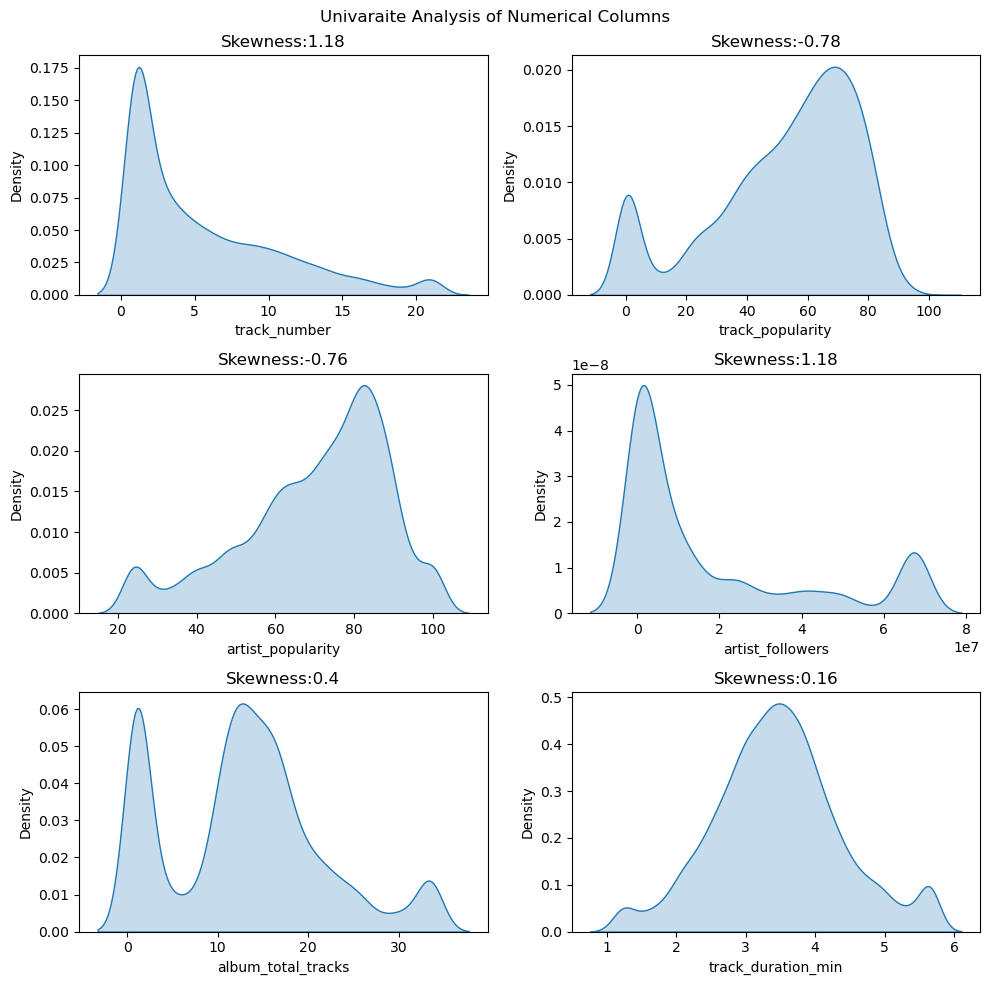

In [153]:
t=1
plt.figure(figsize=(10,10))
plt.suptitle('Univaraite Analysis of Numerical Columns')
for i in num_cols:
    plt.subplot(3,2,t)
    sns.kdeplot(data=clean_data,x=i,fill=True)
    skew=clean_data[i].skew()
    plt.title(f'Skewness:{round(skew,2)}')
    t+=1
plt.tight_layout()
plt.show()

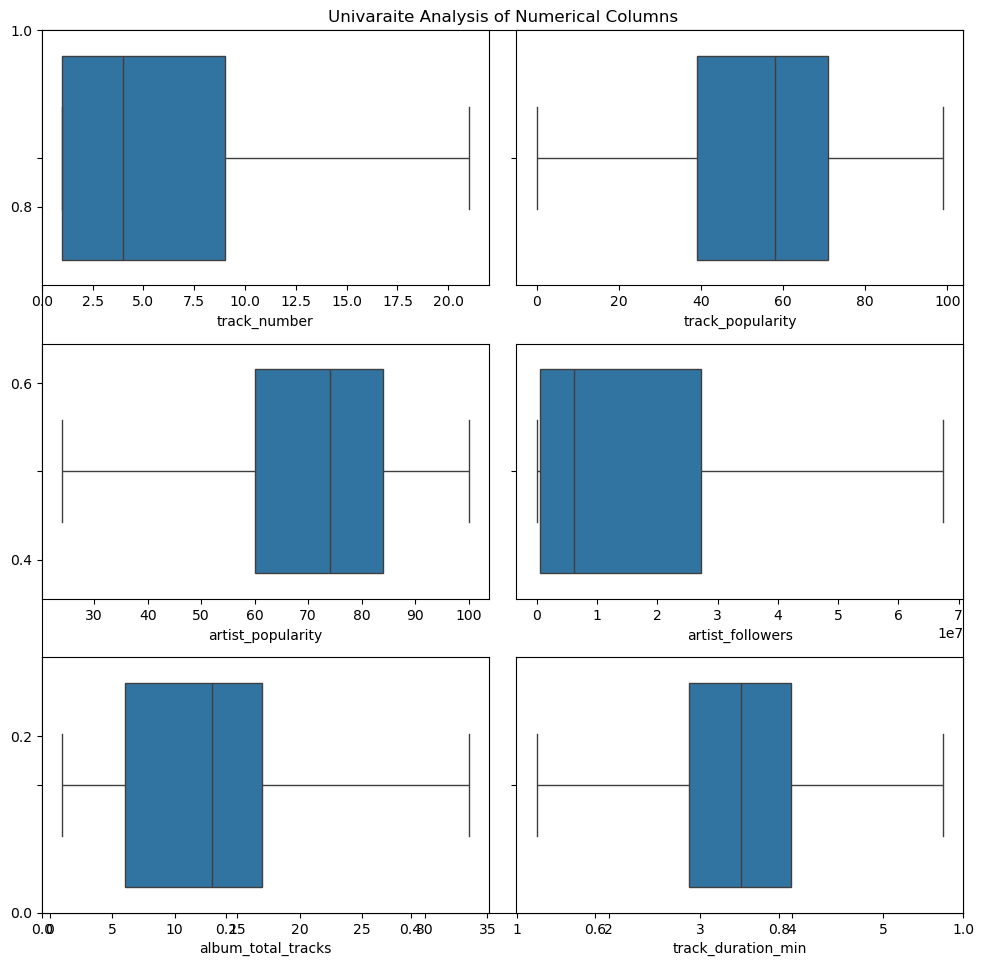

In [154]:
t=1
plt.figure(figsize=(10,10))
plt.title('Univaraite Analysis of Numerical Columns')
for i in num_cols:
    plt.subplot(3,2,t)
    sns.boxplot(data=clean_data,x=i,fill=True)
    t+=1
plt.tight_layout()
plt.show()

In [155]:
cat_cols

Index(['track_id', 'track_name', 'artist_name', 'artist_genres', 'album_id',
       'album_name', 'album_release_date', 'album_type'],
      dtype='object')

In [156]:
clean_data.head()

,track_id,track_name,track_number,track_popularity,explicit,artist_name,artist_popularity,artist_followers,artist_genres,album_id,album_name,album_release_date,album_total_tracks,album_type,track_duration_min,year
0,3EJS5LyekDim1Tf5rBFmZl,Trippy Mane (ft. Project Pat),4.0,0,True,Diplo,77.0,2812821.0,moombahton,5QRFnGnBeMGePBKF2xTz5z,"d00mscrvll, Vol. 1",2025-10-31,9.0,album,1.55,2025
1,1oQW6G2ZiwMuHqlPpP27DB,OMG!,1.0,0,True,Yelawolf,64.0,2363438.0,"country hip hop, southern hip hop",4SUmmwnv0xTjRcLdjczGg2,OMG!,2025-10-31,1.0,single,3.07,2025
2,7mdkjzoIYlf1rx9EtBpGmU,Hard 2 Find,1.0,4,True,Riff Raff,48.0,193302.0,NaN,3E3zEAL8gUYWaLYB9L7gbp,Hard 2 Find,2025-10-31,1.0,single,2.55,2025
3,67rW0Zl7oB3qEpD5YWWE5w,Still Get Like That (ft. Project Pat & Starrah),8.0,30,True,Diplo,77.0,2813710.0,moombahton,5QRFnGnBeMGePBKF2xTz5z,"d00mscrvll, Vol. 1",2025-10-31,9.0,album,1.69,2025
4,15xptTfRBrjsppW0INUZjf,ride me like a harley,2.0,0,True,Rumelis,48.0,8682.0,dark r&b,06FDIpSHYmZAZoyuYtc7kd,come closer / ride me like a harley,2025-10-30,2.0,single,2.39,2025


In [157]:
# Treating the missing values 
clean_data['artist_genres']=clean_data['artist_genres'].fillna('Unkown')
clean_data['artist_name']=clean_data['artist_name'].fillna('Unkown')

In [158]:
clean_data.isnull().sum()

track_id              0
track_name            0
track_number          0
track_popularity      0
explicit              0
artist_name           0
artist_popularity     0
artist_followers      0
artist_genres         0
album_id              0
album_name            0
album_release_date    0
album_total_tracks    0
album_type            0
track_duration_min    0
year                  0
dtype: int64

In [159]:
final_data.isnull().sum()

track_id              0
track_name            2
track_number          0
track_popularity      0
track_duration_ms     0
explicit              0
artist_name           4
artist_popularity     4
artist_followers      4
artist_genres         4
album_id              0
album_name            2
album_release_date    0
album_total_tracks    0
album_type            0
dtype: int64

In [160]:
# Lets treat the missing values in the final data also 
for i in ['artist_popularity','artist_followers' ]:
    if i in final_data.columns:
        final_data[i]=final_data[i].fillna(final_data[i].median())

In [161]:
for i in ['track_name','artist_name','artist_genres','album_name']:
    if i in final_data.columns:
        final_data[i]=final_data[i].fillna('Unkown')

In [162]:
final_data.isnull().sum()

track_id              0
track_name            0
track_number          0
track_popularity      0
track_duration_ms     0
explicit              0
artist_name           0
artist_popularity     0
artist_followers      0
artist_genres         0
album_id              0
album_name            0
album_release_date    0
album_total_tracks    0
album_type            0
dtype: int64

In [163]:
# Lets treat the skewness in the data 
from sklearn.preprocessing import PowerTransformer

In [164]:
transformer=PowerTransformer(standardize=True)
clean_data[num_cols]=transformer.fit_transform(clean_data[num_cols])

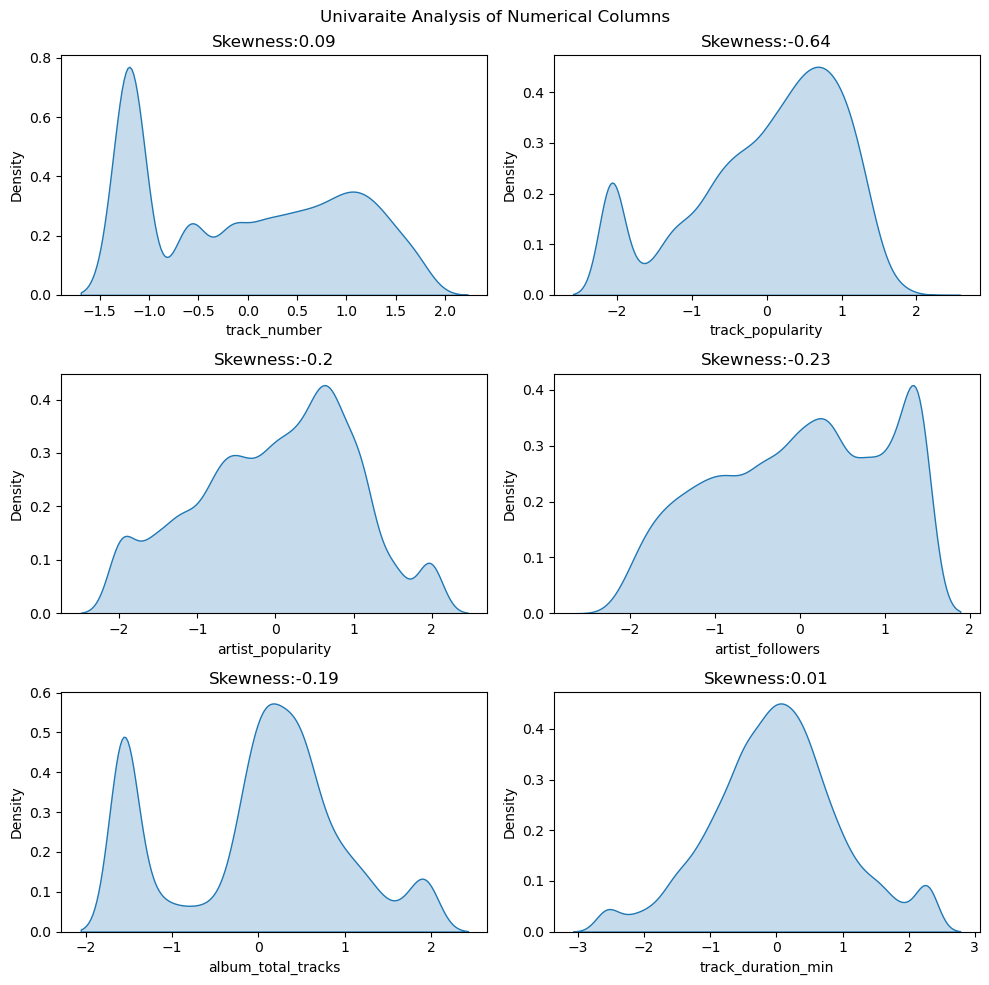

In [165]:
t=1
plt.figure(figsize=(10,10))
plt.suptitle('Univaraite Analysis of Numerical Columns')
for i in num_cols:
    plt.subplot(3,2,t)
    sns.kdeplot(data=clean_data,x=i,fill=True)
    skew=clean_data[i].skew()
    plt.title(f'Skewness:{round(skew,2)}')
    t+=1
plt.tight_layout()
plt.show()

# Data Modeling 

In [166]:
x=clean_data.drop(columns='track_popularity')
y=clean_data['track_popularity']

In [167]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_absolute_percentage_error,root_mean_squared_error,mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [168]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.75,random_state=2)

In [169]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(6436, 15) (2146, 15) (6436,) (2146,)


# Model Building 

In [170]:
models={
    'LinearRegression':LinearRegression(),
    'Ridge':Ridge(alpha=0.01),
    'Lasso':Lasso(alpha=0.01),
    'KNeighbors':KNeighborsRegressor(n_neighbors=7),
    'DecisionTree':DecisionTreeRegressor(max_depth=8,random_state=2),
    'RandomForest':RandomForestRegressor(n_estimators=250,random_state=2),
    'GradientBoosting':GradientBoostingRegressor(random_state=2)
}


result=[]

In [171]:
feature_cols = ['track_number', 'track_duration_min',
                'artist_popularity', 'artist_followers',
                'album_total_tracks']

In [172]:
numeric_features=feature_cols
scaler=StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', scaler, numeric_features)
    ]
)

# Train Model and Evaluate Model

In [173]:
for name, model in models.items():
    pipe = Pipeline(steps=[('preprocess', preprocessor),
                           ('model', model)])
    pipe.fit(x_train, y_train)
    y_pred = pipe.predict(x_test)

    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    result.append({'Model': name, 'R2 Score': r2, 'RMSE': rmse})

results_df = pd.DataFrame(result)
results_df.sort_values(by='R2 Score', ascending=False)

,Model,R2 Score,RMSE
6,GradientBoosting,0.302084,0.814868
5,RandomForest,0.279371,0.828022
4,DecisionTree,0.251122,0.844095
1,Ridge,0.220674,0.861084
0,LinearRegression,0.220674,0.861084
2,Lasso,0.219967,0.861474
3,KNeighbors,0.190893,0.877382


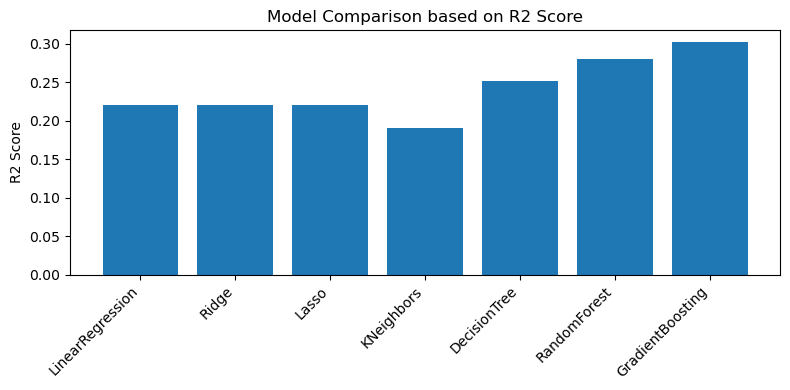

In [176]:
plt.figure(figsize=(8,4))
plt.bar(results_df['Model'], results_df['R2 Score'])
plt.xticks(rotation=45, ha='right')
plt.ylabel('R2 Score')
plt.title('Model Comparison based on R2 Score')
plt.tight_layout()
plt.show()

# Conclusion 

* The dataset contains information about tracks, artists, and albums on Spotify, including popularity scores.
* Detailed EDA was performed: distributions of numerical variables, categorical breakdowns, time-based trends, and relationships with track popularity.
* Multiple regression models were trained, including Linear Regression, Ridge, Lasso, KNN, Decision Tree, Random Forest, Gradient Boosting, Extra Trees, and optionally XGBoost.
* Model performance was evaluated using R2 Score and RMSE, and a comparison plot highlighted the strongest models.
* In general, ensemble tree-based models (such as Random Forest, Gradient Boosting) tend to perform better on this kind of tabular data than simple linear models.